# Object Localization and Detection
Localization refers to indentifying where in the given picture is the object you've classified present. There can even be multiple objects in the same image that we should detect and localize. Generally, we localize by  putting a bounding box on the identified object.
![alt text](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/more_images/LocalizationDetection.png)
Image source: https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/object_localization_and_detection.html

### Important Applications:
* Self-driving cars
* Face detection
* Surveillance
* Manufacturing industry
* Object tracking

## Sliding window


In [1]:
from keras.applications.vgg16 import VGG16
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 38s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

In [64]:
from google.colab import files
files.upload()

{}

In [4]:
# image from google open images
!wget https://c1.staticflickr.com/9/8090/8478106876_e08ac630ed_o.jpg
!mv 8478106876_e08ac630ed_o.jpg test2_bb.jpg


Redirecting output to ‘wget-log’.


(1299, 927, 3)

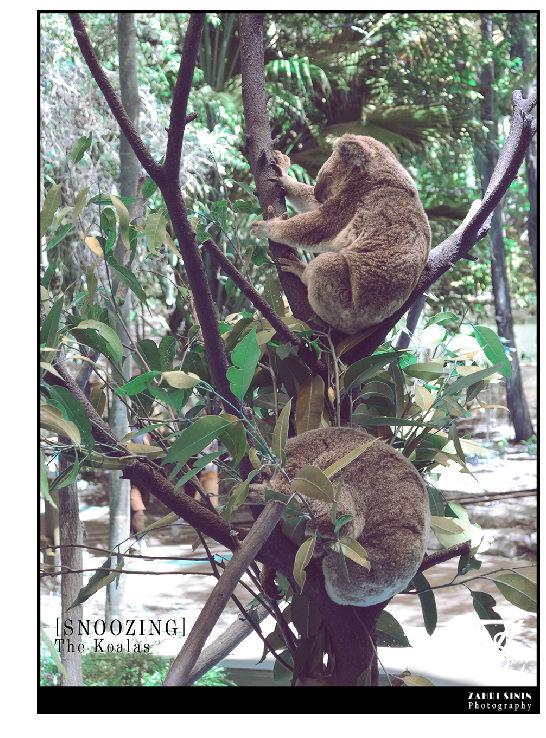

In [35]:
img = cv2.imread('test2_bb.jpg')
plt.figure(figsize=(9,16))
plt.imshow(img)
plt.axis('off')
img.shape

In [0]:
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [0]:
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [33]:
%%timeit

h, w = 224, 224

preproc_img = preprocess_input(img.astype('float'))

for (x, y, window) in sliding_window(preproc_img, stepSize=150, windowSize=(h, w)):
  if window.shape[0] != h or window.shape[1] != w:
			continue

  pred = model.predict(np.expand_dims(window, axis=0))
  preds = decode_predictions(pred)
  pred_labels = [tup[1] for tup in preds[0] if tup[2] > 0.989] # index 1 corresponds to the name of the class
  
  if 'koala' in pred_labels: # modify line to get all/desired labels
    print('koala found at ', (x, y))
    
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

koala found at  (300, 300)
koala found at  (450, 300)
koala found at  (450, 450)
koala found at  (600, 750)
koala found at  (450, 900)
1 loop, best of 3: 1.22 s per loop


(-0.5, 926.5, 1298.5, -0.5)

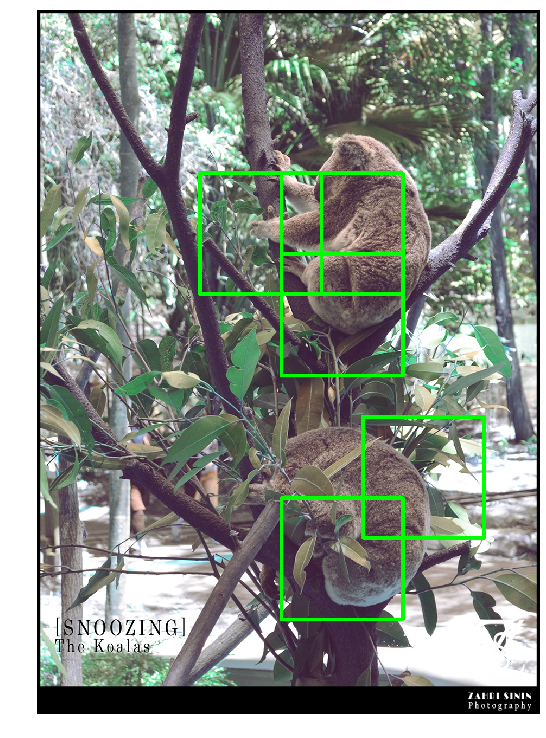

In [34]:
plt.figure(figsize=(9,16))
plt.imshow(img)
plt.axis('off')

### Disadvantages
* Very slow
* Not very flexible with bounding box sizes
* Multiple bounding boxes add further computation ([non-max suppression](https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/) for multiple box on same object)

**Verdict:**  Do not use this

## Regression methods

Make the identification of the object's location and the size of bounding box a regression problem. Annotations are part of your training dataset.

![regression](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/more_images/LocalizationRegression2.png)

### Disadvantages:
* Only fixed number of bounding boxes at a time

## Some useful resources

* https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/object_localization_and_detection.html
* https://www.coursera.org/lecture/convolutional-neural-networks/object-localization-nEeJM
* https://www.kaggle.com/c/imagenet-object-localization-challenge